# Train Plots

## Read Data

## Plots

# Test Plots

## Read Data

In [55]:
import pandas as pd
import matplotlib.pyplot as plt


# Read CSV files from the directory
csv_path = 'runs/test/exp3/'
results = 'test_results.csv'
summary = 'test_summary.csv'
save_path = '/home/ondra/BC/graphs/real_train_real_test/'

df_results = pd.read_csv(csv_path + results)  # Replace 'data.csv' with the actual file name
print(df_results.head())

df_summary = pd.read_csv(csv_path + summary)  # Replace 'summary.csv' with the actual file name
print(df_summary.head())

   distance_gt  distance_pred  mean_vertex_dist  trans_dist  angle_dist  \
0     4.550000       4.684610          0.134599    0.134958    1.146996   
1    16.320999      16.994588          0.675809    0.675821    0.974177   
2    31.851999      31.940578          0.164344    0.163183    3.411148   
3     4.603000       4.592134          0.039220    0.038491    1.731082   
4     3.934000       3.998862          0.066045    0.066153    1.029511   

   mean_corner_dist       iou  z_axis_angle_error  heading_error  diam  
0          2.815907  0.910580            0.874828       3.869654   0.2  
1          1.575907  0.753639            0.962779       1.446397   0.2  
2          3.179279  0.424872            3.183870      15.474880   0.2  
3          6.129469  0.858994            1.626971       7.959793   0.2  
4          2.576745  0.906644            0.961526       4.712696   0.2  
   mean_corner_err_2d  pixel_threshold  vertex_threshold      acc2d     acc3d  \
0            2.784074         

## Plots


### Plot translation distance over distance

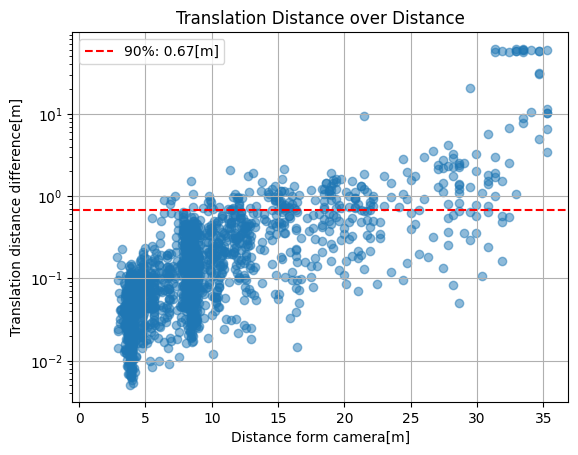

In [85]:
fig, ax = plt.subplots()

# it is a distance between t_pred and t_gt
scatter = ax.scatter(df_results['distance_gt'], df_results['trans_dist'], alpha=0.5)

# Calculate the 90th percentile of the translation distance
percentile_90 = df_results['trans_dist'].quantile(0.9)

# Add a horizontal line at the 90th percentile
ax.axhline(y=percentile_90, color='r', linestyle='--', label=f'90%: {percentile_90:.2f}[m]')
ax.legend()

ax.set_xlim(-0.5)
ax.set_yscale('log')
ax.set_title('Translation Distance over Distance')
ax.set_xlabel('Distance form camera[m]')
ax.set_ylabel('Translation distance difference[m]')
ax.grid(True)

# Save the plot as a PDF
fig.savefig(save_path + 'translation_distance_over_distance.pdf', format='pdf')
plt.show()

### Plot rotation distance over distance

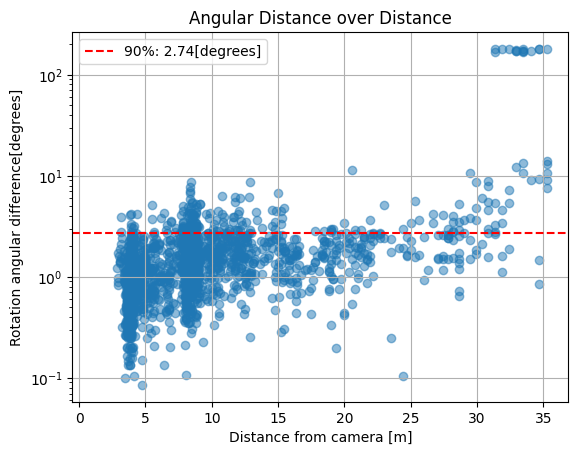

In [84]:
fig, ax = plt.subplots()

# Scatter plot
scatter = ax.scatter(df_results['distance_gt'], df_results['angle_dist'], alpha=0.5)

# Calculate the 90th percentile of the angle distance
percentile_90 = df_results['angle_dist'].quantile(0.9)

# Add a horizontal line at the 90th percentile
ax.axhline(y=percentile_90, color='r', linestyle='--', label=f'90%: {percentile_90:.2f}[degrees]')
ax.legend()

ax.set_xlim(-0.5)
ax.set_yscale('log')
ax.set_title('Angular Distance over Distance')
ax.set_xlabel('Distance from camera [m]')
ax.set_ylabel('Rotation angular difference[degrees]')
ax.grid(True)

# Save the plot as a PDF
fig.savefig(save_path + 'angular_distance_over_distance_log.pdf', format='pdf')
plt.show()

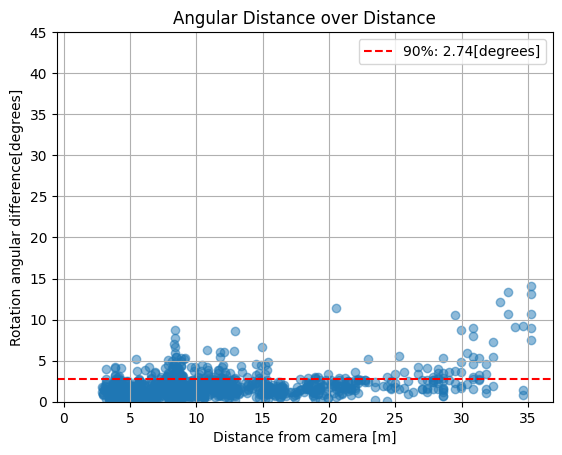

In [83]:
fig, ax = plt.subplots()

# Scatter plot
scatter = ax.scatter(df_results['distance_gt'], df_results['angle_dist'], alpha=0.5)

# Calculate the 90th percentile of the angle distance
percentile_90 = df_results['angle_dist'].quantile(0.9)

# Add a horizontal line at the 90th percentile
ax.axhline(y=percentile_90, color='r', linestyle='--', label=f'90%: {percentile_90:.2f}[degrees]')
ax.legend()

ax.set_xlim(-0.5)
ax.set_ylim(0, 45)
ax.set_title('Angular Distance over Distance')
ax.set_xlabel('Distance from camera [m]')
ax.set_ylabel('Rotation angular difference[degrees]')
ax.grid(True)

# Save the plot as a PDF
fig.savefig(save_path + 'angular_distance_over_distance.pdf', format='pdf')
plt.show()

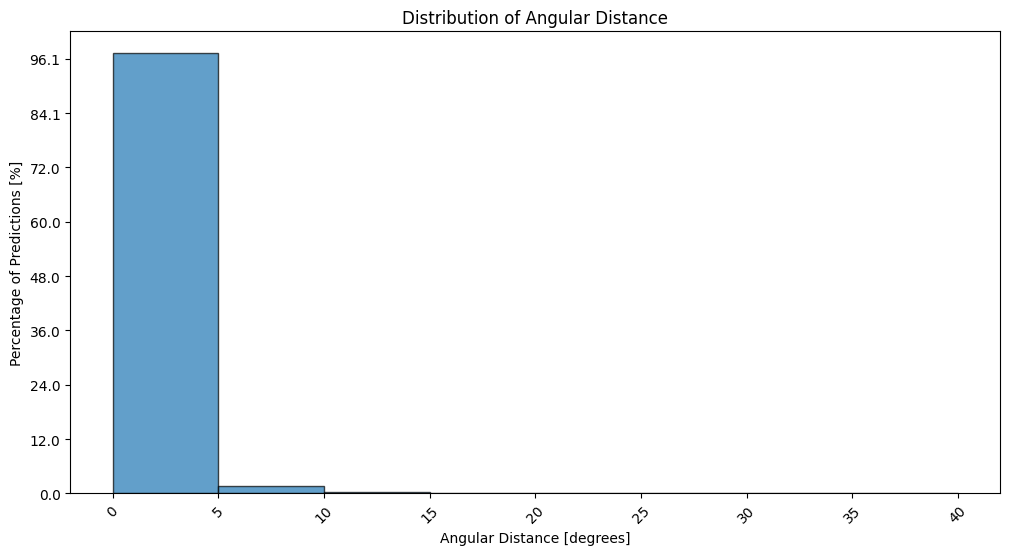

In [82]:
fig, ax = plt.subplots()

# Plot the histogram
counts, _, _ = ax.hist(df_results['angle_dist'], bins=bins, edgecolor='black', alpha=0.7)

ax.set_title('Distribution of Angular Distance')
ax.set_xlabel('Angular Distance [degrees]')
ax.set_ylabel('Percentage of Predictions [%]')
ax.set_xticks(bins)
ax.tick_params(axis='x', rotation=45)
total_predictions = len(df_results)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{(y / total_predictions) * 100:.1f}'))

fig.set_size_inches(12, 6)  # Set the figure size to make the plot wider

# Save the plot as a PDF
fig.savefig(save_path + 'angular_distance_distribution.pdf', format='pdf')

### Corner distance over distance

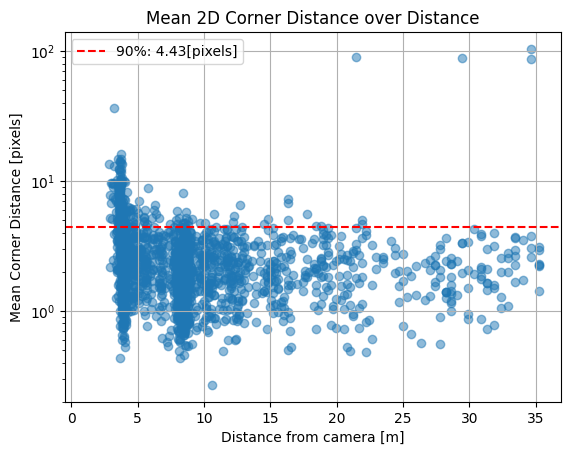

In [71]:

fig, ax = plt.subplots()

# Scatter plot
scatter = ax.scatter(df_results['distance_gt'], df_results['mean_corner_dist'], alpha=0.5)

# Calculate the 90th percentile of the mean corner distance
percentile_90 = df_results['mean_corner_dist'].quantile(0.9)

# Add a horizontal line at the 90th percentile
ax.axhline(y=percentile_90, color='r', linestyle='--', label=f'90%: {percentile_90:.2f}[pixels]')
ax.legend()

ax.set_xlim(-0.5)
ax.set_yscale('log')
ax.set_title('Mean 2D Corner Distance over Distance')
ax.set_xlabel('Distance from camera [m]')
ax.set_ylabel('Mean Corner Distance [pixels]')
ax.grid(True)

# Save the plot as a PDF
fig.savefig(save_path + 'mean_corner_distance_over_distance_log.pdf', format='pdf')
plt.show() 

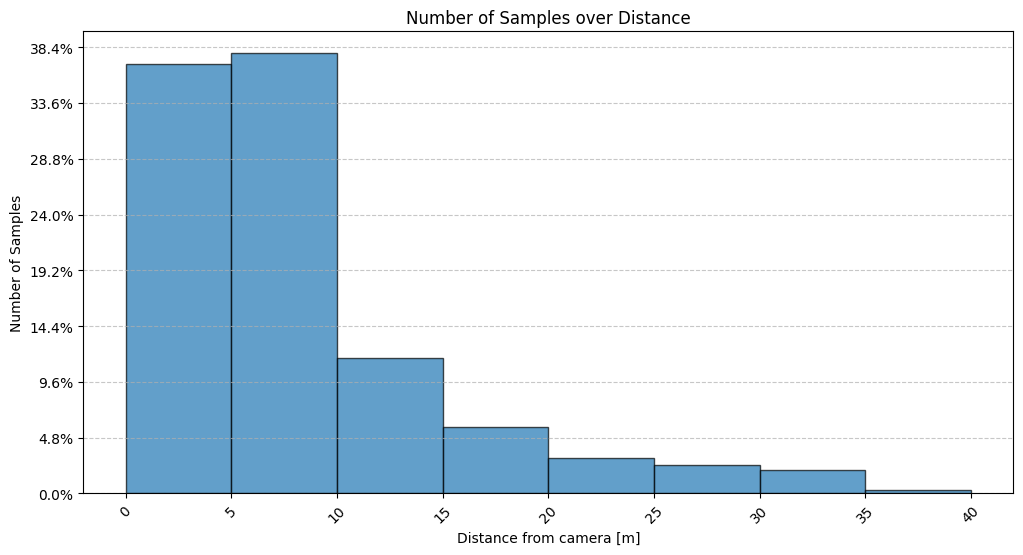

In [81]:
# number of samples over distance
# Define bins for the histogram
fig, ax = plt.subplots()

# Define bins for the histogram
bins = range(0, int(df_results['distance_gt'].max()) + 6, 5)

# Plot the histogram
counts, _, _ = ax.hist(df_results['distance_gt'], bins=bins, edgecolor='black', alpha=0.7)

ax.set_title('Number of Samples over Distance')
ax.set_xlabel('Distance from camera [m]')
ax.set_ylabel('Number of Samples')
ax.set_xticks(bins)
ax.tick_params(axis='x', rotation=45)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{(y / len(df_results)) * 100:.1f}%'))
fig.set_size_inches(12, 6)  # Set the figure size to make the plot wider
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as a PDF
fig.savefig(save_path + 'number_of_samples_over_distance.pdf', format='pdf')
plt.show()

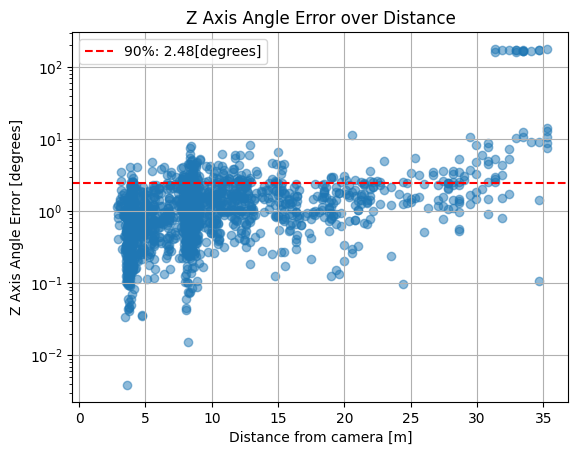

In [74]:
fig, ax = plt.subplots()

# osa Z
scatter = ax.scatter(df_results['distance_gt'], df_results['z_axis_angle_error'], alpha=0.5)

# Calculate the 90th percentile of the translation distance
percentile_90 = df_results['z_axis_angle_error'].quantile(0.9)

# Add a horizontal line at the 90th percentile
ax.axhline(y=percentile_90, color='r', linestyle='--', label=f'90%: {percentile_90:.2f}[degrees]')
ax.legend()

ax.set_xlim(-0.5)
ax.set_yscale('log')
ax.set_title('Z Axis Angle Error over Distance')
ax.set_xlabel('Distance from camera [m]')
ax.set_ylabel('Z Axis Angle Error [degrees]')
ax.grid(True)

# Save the plot as a PDF
fig.savefig(save_path + 'z_axis_angle_error_over_distance_log.pdf', format='pdf')
plt.show()

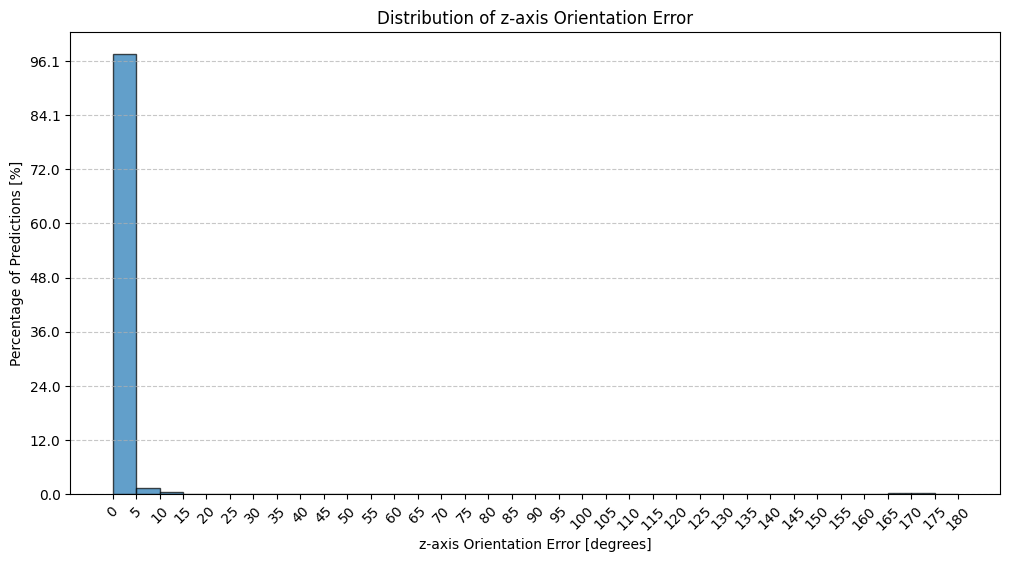

In [80]:
fig, ax = plt.subplots()

# Define bins for the histogram
bins = range(0, int(df_results['z_axis_angle_error'].max()) + 5, 5)

# Plot the histogram
counts, _, _ = ax.hist(df_results['z_axis_angle_error'], bins=bins, edgecolor='black', alpha=0.7)

ax.set_title('Distribution of z-axis Orientation Error')
ax.set_xlabel('z-axis Orientation Error [degrees]')
ax.set_ylabel('Percentage of Predictions [%]')
ax.set_xticks(bins)
ax.tick_params(axis='x', rotation=45)
total_predictions = len(df_results)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{(y / total_predictions) * 100:.1f}'))
ax.grid(axis='y', linestyle='--', alpha=0.7)

fig.set_size_inches(12, 6)  # Set the figure size to make the plot wider

# Save the plot as a PDF
fig.savefig(save_path + 'z_axis_orientation_error_distribution.pdf', format='pdf')
plt.show()


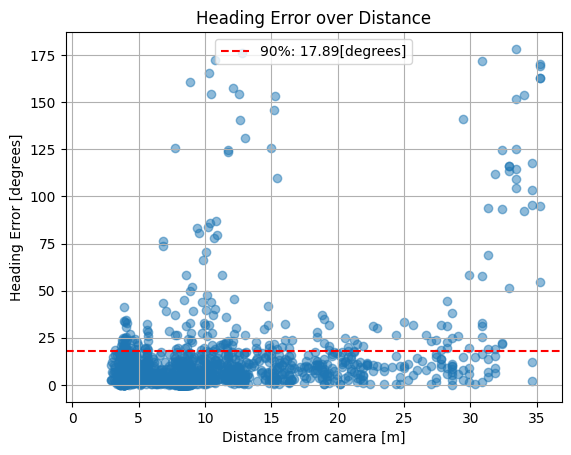

In [77]:
fig, ax = plt.subplots()

# Heading
scatter = ax.scatter(df_results['distance_gt'], df_results['heading_error'], alpha=0.5)

# Calculate the 90th percentile of the heading error
percentile_90 = df_results['heading_error'].quantile(0.9)

# Add a horizontal line at the 90th percentile
ax.axhline(y=percentile_90, color='r', linestyle='--', label=f'90%: {percentile_90:.2f}[degrees]')
ax.legend()

ax.set_xlim(-0.5)
ax.set_title('Heading Error over Distance')
ax.set_xlabel('Distance from camera [m]')
ax.set_ylabel('Heading Error [degrees]')
ax.grid(True)

# Save the plot as a PDF
fig.savefig(save_path + 'heading_error_over_distance.pdf', format='pdf')
plt.show()

In [65]:
# Error in x y z , where x is vector heading in the direction of target. 

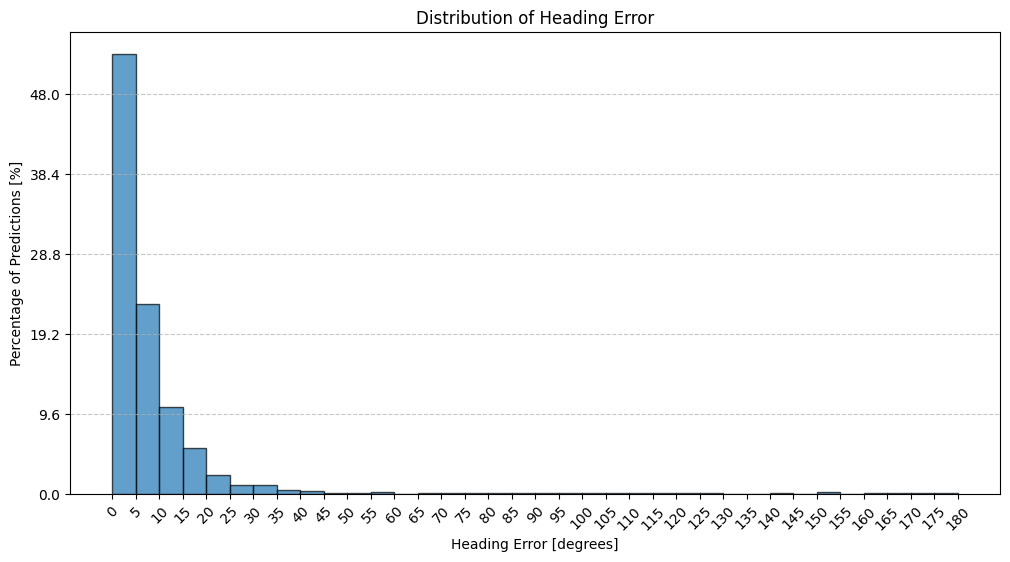

In [79]:
fig, ax = plt.subplots()

# Plot the histogram
counts, _, _ = ax.hist(df_results['heading_error'], bins=bins, edgecolor='black', alpha=0.7)

ax.set_title('Distribution of Heading Error')
ax.set_xlabel('Heading Error [degrees]')
ax.set_ylabel('Percentage of Predictions [%]')
ax.set_xticks(bins)
ax.tick_params(axis='x', rotation=45)
total_predictions = len(df_results)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{(y / total_predictions) * 100:.1f}'))
ax.grid(axis='y', linestyle='--', alpha=0.7)

fig.set_size_inches(12, 6)  # Set the figure size to make the plot wider

# Save the plot as a PDF
fig.savefig(save_path + 'heading_error_distribution.pdf', format='pdf')
plt.show()